# Cleaning the Data

In [46]:
import pandas as pd

good_run = pd.read_csv('MM10 Good Run.csv', parse_dates=['TIME_STAMP'])
bad_run = pd.read_csv('MM10 Nozzle Leak.csv', parse_dates=['TIME_STAMP'])

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

class PivotTransformer(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self  # nothing else to do
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        needed_cols = X.filter(['TIME_STAMP', 'CAPAB_NAME', 'DATA_VALUE'], axis=1)
        pivot_data = needed_cols.pivot(index='TIME_STAMP', columns='CAPAB_NAME', values='DATA_VALUE')
        reset_data = pivot_data.reset_index()

        clean_data = reset_data.drop(0, axis=0)
        clean_data = clean_data.drop(clean_data.columns[1], axis=1)

        unrelated_columns = "Mold Close Position (Mold Protect)", "Mold Load Detect Monitor Mode","Mold Load Detect Status", "Mold Open Limit Position", "Mold Protect Monitor Status (By Time)", "Mold Protect Monitor Time"
        unrelated_ix = [clean_data .columns.get_loc(c) for c in unrelated_columns]
        clean_data  = clean_data.drop(clean_data.columns[unrelated_ix], axis =1)
        return clean_data


In [48]:
pivoter = PivotTransformer()
good_run = pivoter.transform(good_run)
good_run.head()

CAPAB_NAME,TIME_STAMP,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure
1,2022-10-05 00:00:04,500.18,500.18,509.9,519.80,510.62,78.010727,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10404.49128
2,2022-10-05 00:00:24,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663
3,2022-10-05 00:00:44,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663
4,2022-10-05 00:01:04,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10585.77663
5,2022-10-05 00:01:24,499.64,499.82,509.9,520.16,509.54,77.994555,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10406.04345


In [49]:
bad_run = pivoter.transform(bad_run)
bad_run.head()

CAPAB_NAME,TIME_STAMP,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure
1,2022-09-28 11:43:46,281.66,399.92,399.92,399.92,399.56,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449
2,2022-09-28 11:44:06,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449
3,2022-09-28 11:44:26,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449
4,2022-09-28 11:44:46,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449
5,2022-09-28 11:45:06,281.84,399.92,399.92,399.92,399.74,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449


In [50]:
good_run['Label'] = 0
bad_run['Label'] = 1
total_runs = pd.concat([good_run, bad_run])
total_runs['Label'].value_counts()

0    10547
1     9226
Name: Label, dtype: int64

In [51]:
total_runs.head()

CAPAB_NAME,TIME_STAMP,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure,Label
1,2022-10-05 00:00:04,500.18,500.18,509.9,519.80,510.62,78.010727,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10404.49128,0
2,2022-10-05 00:00:24,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663,0
3,2022-10-05 00:00:44,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663,0
4,2022-10-05 00:01:04,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10585.77663,0
5,2022-10-05 00:01:24,499.64,499.82,509.9,520.16,509.54,77.994555,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10406.04345,0


# Creating Test Set

In [52]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(total_runs, test_size=0.2, random_state=42)

## Correlations

In [53]:
corr_matrix = train_set.corr()
corr_matrix["Label"].sort_values(ascending=False)

CAPAB_NAME
Label                        1.000000
Dose Time                    0.294164
Ejector Ejection Position    0.113154
Cooling Time                 0.106077
Filling Peak Pressure        0.031543
Cycle Time                   0.015031
Barrel Temp Zone 4          -0.092812
Barrel Temp Zone 3          -0.116979
Barrel Temp Zone 2          -0.160872
Clamp Tonnage After Hold    -0.162150
Barrel Temp Zone 5          -0.176247
Ejector Ejection Speed      -0.193484
Injection Speed             -0.195173
Barrel Temp Zone 1          -0.203753
Pack Pressure               -0.307054
Filling Time                -0.379614
Min Cushion Position        -0.417243
Name: Label, dtype: float64

array([[<AxesSubplot:xlabel='Label', ylabel='Label'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Label'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Label'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Label'>],
       [<AxesSubplot:xlabel='Label', ylabel='Pack Pressure'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Pack Pressure'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Pack Pressure'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Pack Pressure'>],
       [<AxesSubplot:xlabel='Label', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Filling Time'>],
       [<AxesSubplot:xlabel='Label', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='M

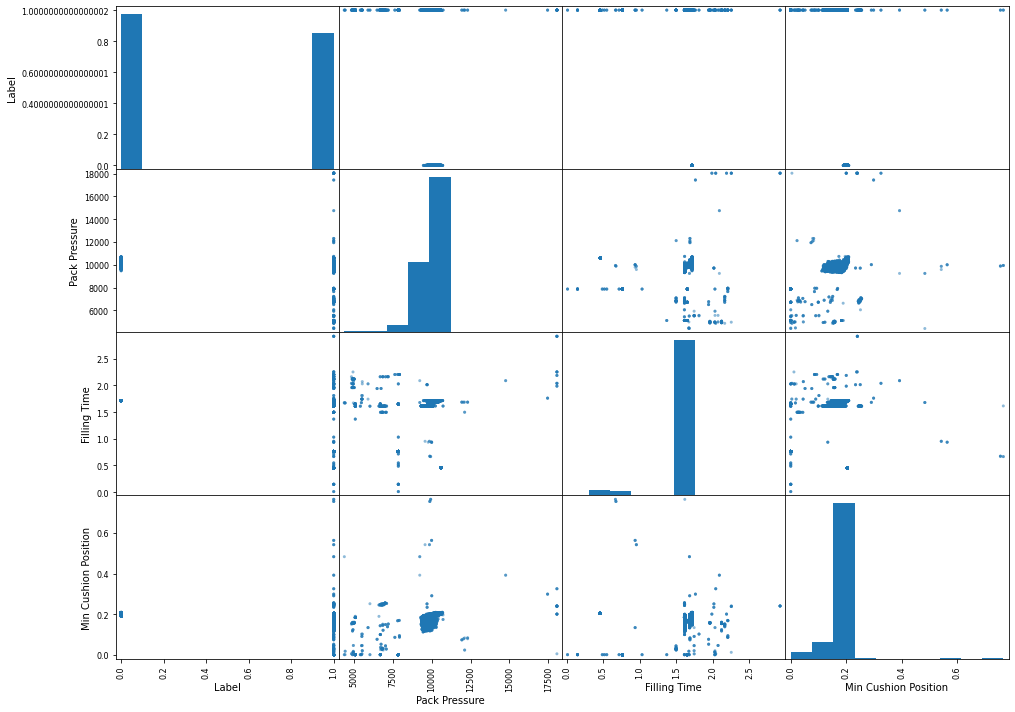

In [54]:
from pandas.plotting import scatter_matrix
attributes = ['Label','Pack Pressure', 'Filling Time', 'Min Cushion Position']
scatter_matrix(total_runs[attributes], figsize=(16, 12))

# Classification Models

## Stochastic Gradient Descent (SGD) Classifier

In [55]:
from sklearn.linear_model import SGDClassifier

train_set_label = train_set['Label']
train_set = train_set.drop(['TIME_STAMP', 'Label'], axis=1)

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(train_set, train_set_label)

SGDClassifier(random_state=42)

### Confusion Matrix

In [56]:
from sklearn.model_selection import cross_val_predict

train_pred = cross_val_predict(sgd_clf, train_set, train_set_label, cv=3)

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_set_label, train_pred)

array([[5628, 2814],
       [4314, 3062]], dtype=int64)

### Precision & Recall

In [58]:
from sklearn.metrics import precision_score, recall_score

precision_score(train_set_label, train_pred)

0.5211027910142955

In [59]:
recall_score(train_set_label, train_pred)

0.4151301518438178

### Precision/Recall Trade-off

In [60]:
scores = cross_val_predict(sgd_clf, train_set, train_set_label, cv=3, method="decision_function")

In [61]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(train_set_label, scores)

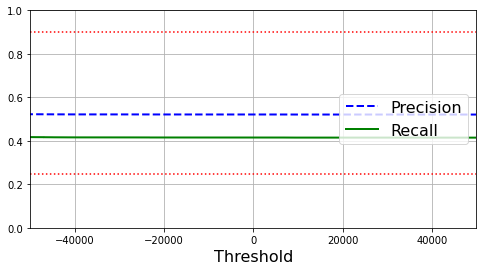

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

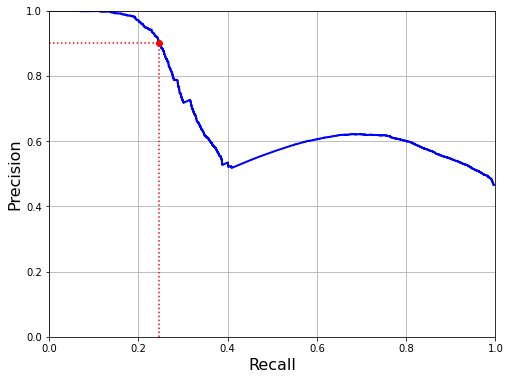

In [63]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

### The ROC Curve

In [64]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_set_label, scores)

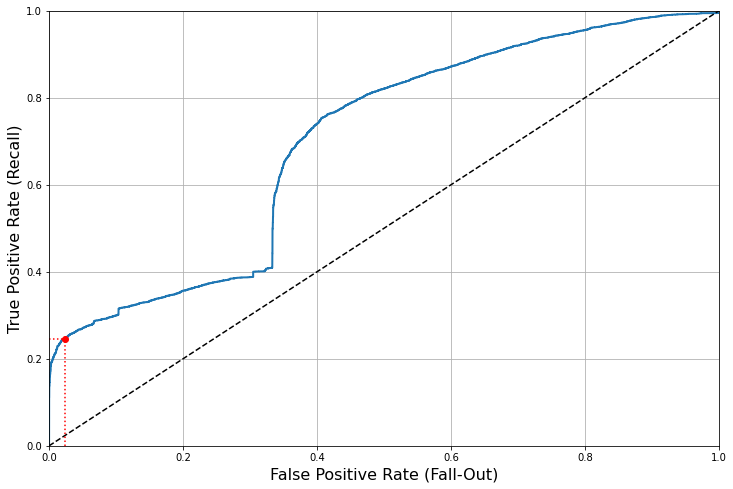

In [65]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(12, 8))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

In [66]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_set_label, scores)

0.6988253649632223

## Random Forest Classifier

In [67]:

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, train_set, train_set_label, cv=3, method="predict_proba")

In [68]:
scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_label, scores_forest)

### ROC Curve Comparision

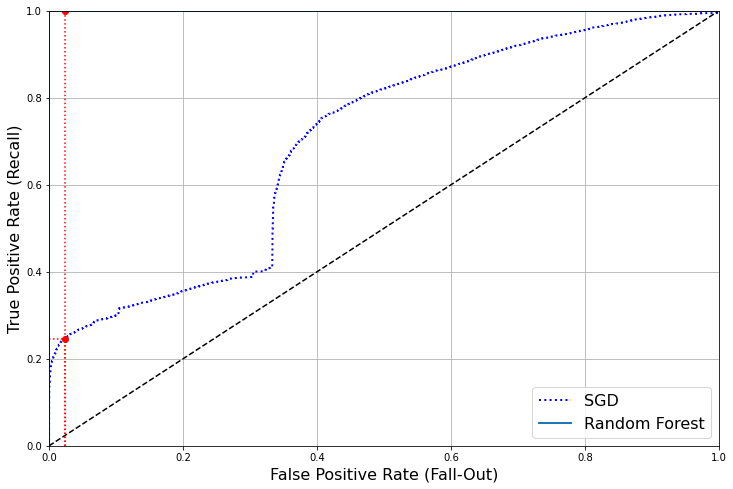

In [69]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [70]:
roc_auc_score(train_set_label, scores_forest)

0.9999999036426174

### Precision & Recall

In [71]:
train_pred_forest = cross_val_predict(forest_clf, train_set, train_set_label, cv=3)
precision_score(train_set_label, train_pred_forest)

1.0

In [72]:
recall_score(train_set_label, train_pred_forest)

0.9995932754880694